In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
class KMeans:
    """
    Simple implementation of the k-means clustering algorithm.

    Attributes:
        n_clusters (int): Number of clusters to form.
        n_init (int): Number of time the k-means algorithm will be run with different centroid seeds.
        max_iter (int): Maximum number of iterations of the k-means algorithm for a single run.
        tol (float): Relative tolerance with regards to inertia to declare convergence.
        centroids (np.ndarray): Array of centroids found at the last iteration of k-means.
        inertia_ (float): Sum of squared distances of samples to their closest cluster center.
    """
    
    def __init__(self, n_clusters: int = 3, n_init: int = 10, max_iter: int = 300, tol: float = 0.0001) -> None:
        """
        Initializes the KMeans clustering.

        Args:
            n_clusters (int): Number of clusters to form.
            n_init (int): Number of time the k-means algorithm will be run with different centroid seeds.
            max_iter (int): Maximum number of iterations of the k-means algorithm for a single run.
            tol (float): Relative tolerance with regards to inertia to declare convergence.
        """
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.centroids = None
        self.inertia_ = None

    def fit(self, X: np.ndarray) -> None:
        """
        Compute k-means clustering.

        Args:
            X (np.ndarray): A MxN array of M observations in N dimensions.
        """
        best_inertia = np.inf
        best_centroids = None

        for _ in range(self.n_init):
            # Initialize centroids randomly
            indices = np.random.permutation(X.shape[0])[:self.n_clusters]
            centroids = X[indices]

            for i in range(self.max_iter):
                distances = self.__comp_distances(X, centroids)
                labels = self.__comp_labels(distances)
                new_centroids = self.__comp_centroids(X, labels, self.n_clusters)
                if np.allclose(centroids, new_centroids, atol=self.tol):
                    break
                centroids = new_centroids

            inertia = self.__comp_inertia(X, centroids, labels)
            if inertia < best_inertia:
                best_inertia = inertia
                best_centroids = centroids

        self.centroids = best_centroids
        self.inertia_ = best_inertia

    def predict(self, X: np.ndarray) -> np.ndarray:
        """
        Predict the closest cluster each sample in X belongs to.

        Args:
            X (np.ndarray): A MxN array of M observations in N dimensions.

        Returns:
            labels (np.ndarray): Index of the cluster each sample belongs to.
        """
        distances = self.__comp_distances(X, self.centroids)
        return self.__comp_labels(distances)

    def fit_predict(self, X: np.ndarray) -> np.ndarray:
        """
        Computes cluster centers and predicts cluster index for each sample.

        Args:
            X (np.ndarray): A MxN array of M observations in N dimensions.

        Returns:
            labels (np.ndarray): Index of the cluster each sample belongs to.
        """
        self.fit(X)
        return self.predict(X)
    
    def __comp_centroids(self, X: np.ndarray, labels: np.ndarray, n_clusters: int) -> np.ndarray:
        """
        Compute the centroids of each cluster.

        Args:
            X (np.ndarray): A MxN array of M observations in N dimensions.
            labels (np.ndarray): An array of M cluster labels.
            n_clusters (int): Number of clusters.

        Returns:
            centroids (np.ndarray): An array of shape (n_clusters, N) representing the new centroids.
        """
        centroids = np.zeros((n_clusters, X.shape[1]))
        for k in range(n_clusters):
            centroids[k] = np.mean(X[labels == k], axis=0)
        return centroids

    def __comp_distances(self, X: np.ndarray, centroids: np.ndarray) -> np.ndarray:
        """
        Compute the distance between each point and each centroid.

        Args:
            X (np.ndarray): A MxN array of M observations in N dimensions.
            centroids (np.ndarray): An array of shape (n_clusters, N) representing the centroids.

        Returns:
            distances (np.ndarray): A (n_clusters, M) array of distances.
        """
        distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
        return distances

    def __comp_inertia(self, X: np.ndarray, centroids: np.ndarray, labels: np.ndarray) -> float:
        """
        Compute the inertia (sum of squared distances to the closest centroid).

        Args:
            X (np.ndarray): A MxN array of M observations in N dimensions.
            centroids (np.ndarray): An array of shape (n_clusters, N) representing the centroids.
            labels (np.ndarray): An array of M cluster labels.

        Returns:
            inertia (float): Sum of squared distances of samples to their closest cluster center.
        """
        return np.sum((X - centroids[labels])**2)

    def __comp_labels(self, distances: np.ndarray) -> np.ndarray:
        """
        Assign each sample to the nearest centroid.

        Args:
            distances (np.ndarray): A (n_clusters, M) array of distances.

        Returns:
            labels (np.ndarray): An array of M cluster labels.
        """
        return np.argmin(distances, axis=0)


In [62]:
# Create a dataset
X, _ = make_blobs(n_samples=300, centers=10, cluster_std=0.60, random_state=0)

print(X.shape)
print(X[0])

(300, 2)
[2.94821884 2.03519717]


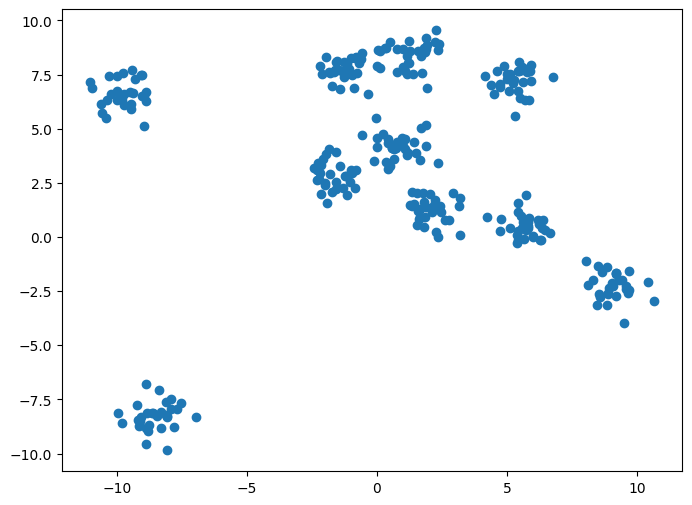

In [63]:
# Plot the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [64]:
# Apply our KMeans
kmeans = KMeans(n_clusters=10)
kmeans.fit(X)

In [65]:
# Predict the cluster labels
labels = kmeans.predict(X)

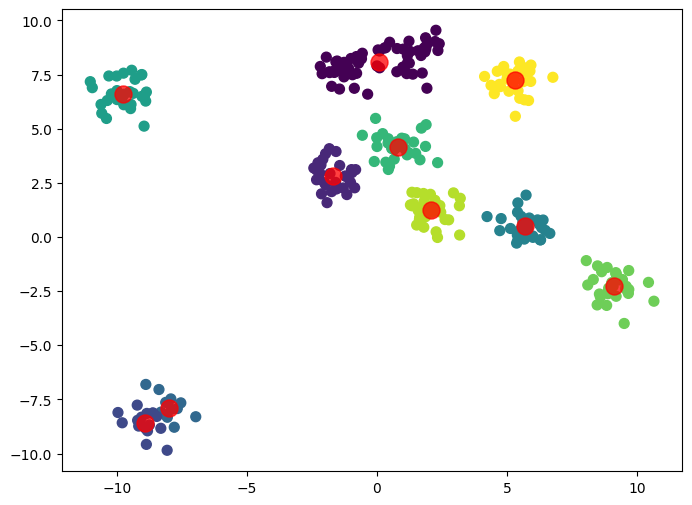

In [66]:
# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
centroids = kmeans.centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=150, alpha=0.75)
plt.show()